In [36]:
import pandas as pd 
import numpy as np


In [37]:
df=pd.read_csv("dress_rental_prices.csv")

In [38]:
df.head(20)

,Unnamed: 0,ID,Name,Brand,Colour,Catagories,Price
0,0,74416,Runway stripe dress,Stella McCartney,beige,dresses,111
1,1,73815,Reformation Kourtney Dress,Reformation,beige,dresses,50
2,2,73801,Ivory Viola bridal dress,Ghost,beige,dresses,75
3,3,73718,Pasu Dress - Rhino Tusk,Coucoo,beige,dresses,37
4,4,73605,Ellen,RIXO,beige,dresses,47
5,5,73583,Elena Dress Crystal Garden,Stine Goya,beige,dresses,64
6,6,73007,OBlanc Dress,New Arrivals,beige,dresses,145
7,7,73245,Melody Dress,Melissa Odabash,beige,dresses,52
8,8,73050,Isamaya Dress,Rat & Boa,beige,dresses,38
9,9,73019,Belted Animal Print Mini Dress,ROTATE BIRGER CHRISTENSEN,beige,dresses,39


In [39]:
df.info

<bound method DataFrame.info of        Unnamed: 0     ID                                    Name  \
0               0  74416                     Runway stripe dress   
1               1  73815              Reformation Kourtney Dress   
2               2  73801                Ivory Viola bridal dress   
3               3  73718                 Pasu Dress - Rhino Tusk   
4               4  73605                                   Ellen   
...           ...    ...                                     ...   
29992       29992    872  Silk and wool-blend crepe dress yellow   
29993       29993    871                 La Guardia Matching Set   
29994       29994    844   One-shoulder ruffled crepe mini dress   
29995       29995    592                            Billie Dress   
29996       29996    231   Yellow Maddie Striped-knit Mini Dress   

                     Brand  Colour  \
0         Stella McCartney   beige   
1              Reformation   beige   
2                    Ghost   beige   

In [40]:
df.isna().sum()

Unnamed: 0      0
ID              0
Name            2
Brand           0
Colour          0
Catagories    114
Price           0
dtype: int64

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [43]:
df.head()

,ID,Name,Brand,Colour,Catagories,Price
0,74416,Runway stripe dress,Stella McCartney,beige,dresses,111
1,73815,Reformation Kourtney Dress,Reformation,beige,dresses,50
2,73801,Ivory Viola bridal dress,Ghost,beige,dresses,75
3,73718,Pasu Dress - Rhino Tusk,Coucoo,beige,dresses,37
4,73605,Ellen,RIXO,beige,dresses,47


In [44]:
df.dropna(subset=['Name'], inplace=True)

In [45]:
df.isna().sum()

ID              0
Name            0
Brand           0
Colour          0
Catagories    114
Price           0
dtype: int64

In [46]:
df['Catagories'].fillna('Unknown', inplace=True)

In [47]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [48]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29995 entries, 0 to 29996
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          29995 non-null  int64 
 1   Name        29995 non-null  object
 2   Brand       29995 non-null  object
 3   Colour      29995 non-null  object
 4   Catagories  29995 non-null  object
 5   Price       29995 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.6+ MB
None


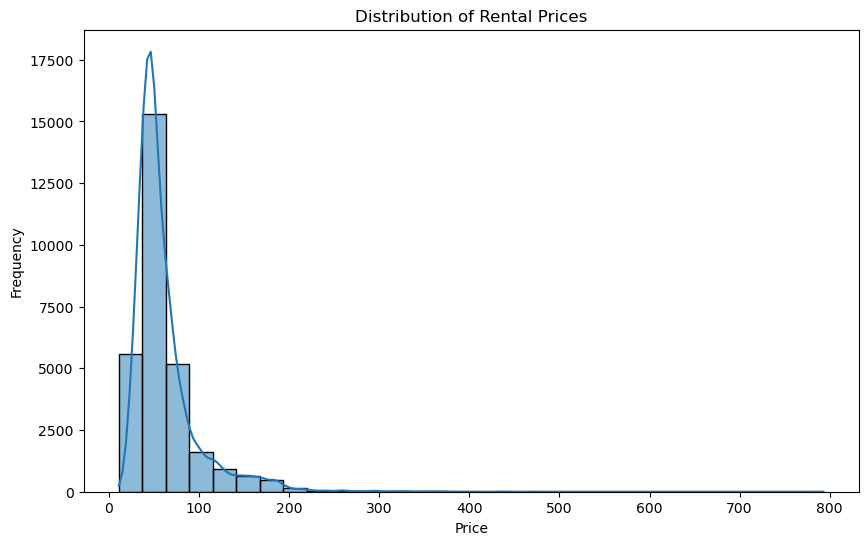

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Rental Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [50]:
from sklearn.preprocessing import OneHotEncoder

In [51]:
encoder = OneHotEncoder(drop='first')
encoded_brands = encoder.fit_transform(df[['Brand']]).toarray()


In [52]:
X = encoded_brands
y = df['Price']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = model.predict(X_test)

In [56]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.0147590099458072e+27
R-squared: -6.782536152439944e+23


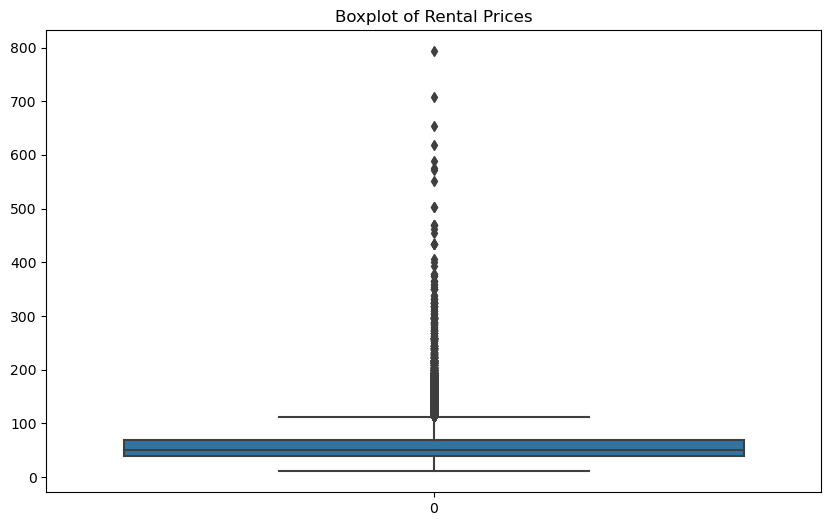

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Price'])
plt.title('Boxplot of Rental Prices')
plt.show()


In [58]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [59]:
df_filtered = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
print(f"Original dataset size: {df.shape[0]}, Filtered dataset size: {df_filtered.shape[0]}")

Original dataset size: 29995, Filtered dataset size: 27503


In [60]:
encoder = OneHotEncoder(drop='first')
encoded_features = encoder.fit_transform(df_filtered[['Brand', 'Colour']]).toarray()


In [61]:
X = encoded_features
y = df_filtered['Price']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error after filtering and including more features: {mse}")
print(f"R-squared after filtering and including more features: {r2}")

Mean Squared Error after filtering and including more features: 1.9599192315123147e+26
R-squared after filtering and including more features: -5.604440918593653e+23


                Price  Brand_Code  Colour_Code
Price        1.000000    0.015393     0.008456
Brand_Code   0.015393    1.000000    -0.000379
Colour_Code  0.008456   -0.000379     1.000000


/var/folders/38/mqzkxw8x3fq0g_rsgg45lnxw0000gn/T/ipykernel_83263/4145762024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Brand_Code'] = df_filtered['Brand'].astype('category').cat.codes
/var/folders/38/mqzkxw8x3fq0g_rsgg45lnxw0000gn/T/ipykernel_83263/4145762024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Colour_Code'] = df_filtered['Colour'].astype('category').cat.codes


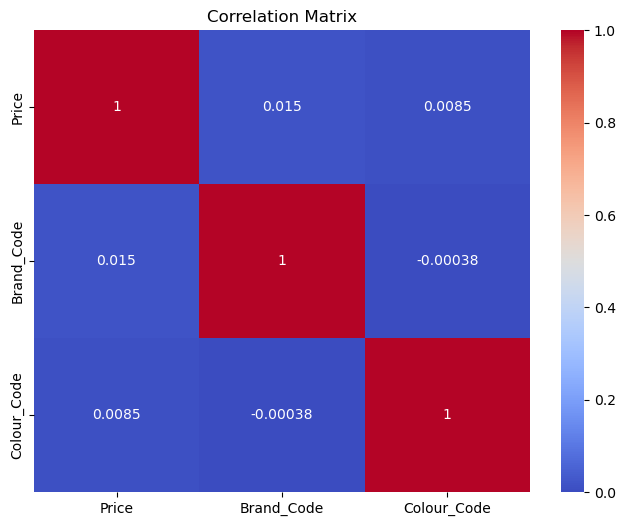

In [63]:
# Convert categorical variables to numerical codes for correlation analysis
df_filtered['Brand_Code'] = df_filtered['Brand'].astype('category').cat.codes
df_filtered['Colour_Code'] = df_filtered['Colour'].astype('category').cat.codes

corr_matrix = df_filtered[['Price', 'Brand_Code', 'Colour_Code']].corr()

print(corr_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [64]:
# Apply log transformation to 'Price'
df_filtered['Log_Price'] = np.log(df_filtered['Price'] + 1)  # Adding 1 to avoid log(0)

X = encoded_features
y = df_filtered['Log_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error after log transformation: {mse}")
print(f"R-squared after log transformation: {r2}")


/var/folders/38/mqzkxw8x3fq0g_rsgg45lnxw0000gn/T/ipykernel_83263/2835945517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Log_Price'] = np.log(df_filtered['Price'] + 1)  # Adding 1 to avoid log(0)


Mean Squared Error after log transformation: 7.12229773959082e+22
R-squared after log transformation: -6.073061163431163e+23


In [65]:
# Re-encode 'Brand' and 'Colour' as features
encoder = OneHotEncoder(drop='first')
encoded_features = encoder.fit_transform(df_filtered[['Brand', 'Colour']]).toarray()


X = encoded_features
y = df_filtered['Log_Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error after feature engineering: {mse}")
print(f"R-squared after feature engineering: {r2}")


Mean Squared Error after feature engineering: 7.12229773959082e+22
R-squared after feature engineering: -6.073061163431163e+23


In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_y_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_r2 = r2_score(y_test, tree_y_pred)
print(f"Decision Tree MSE: {tree_mse}")
print(f"Decision Tree R-squared: {tree_r2}")

forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
forest_model.fit(X_train, y_train)
forest_y_pred = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_y_pred)
forest_r2 = r2_score(y_test, forest_y_pred)
print(f"Random Forest MSE: {forest_mse}")
print(f"Random Forest R-squared: {forest_r2}")


Decision Tree MSE: 0.09230293155683564
Decision Tree R-squared: 0.2129487289015417
Random Forest MSE: 0.08447701492609719
Random Forest R-squared: 0.2796789781779756


In [67]:
print(f"Decision Tree MSE: {tree_mse}")
print(f"Decision Tree R-squared: {tree_r2}")

print(f"Random Forest MSE: {forest_mse}")
print(f"Random Forest R-squared: {forest_r2}")


Decision Tree MSE: 0.09230293155683564
Decision Tree R-squared: 0.2129487289015417
Random Forest MSE: 0.08447701492609719
Random Forest R-squared: 0.2796789781779756
